**Table of contents**<a id='toc0_'></a>    
- [Fitting a squiggly line with a neural network](#toc1_)    
  - [Creating squiggle](#toc1_1_)    
  - [Training a model](#toc1_2_)    
  - [Saving model](#toc1_3_)    
  - [Plotting training history](#toc1_4_)    
    - [matplotlib plot (non interactive) of training and validation loss](#toc1_4_1_)    
    - [plotly (interactive) of training and validation loss](#toc1_4_2_)    
  - [Let's visualize the model structure and weights](#toc1_5_)    
  - [Optimisation](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Fitting a squiggly line with a neural network](#toc0_)

## <a id='toc1_1_'></a>[Creating squiggle](#toc0_)

In [23]:
import numpy as np
np.random.seed(10)
x =  np.sort(np.random.uniform(0, 1, 50000))
y = np.sinc(2 *  x) +  np.random.normal(0, 0.01, size=x.shape) 

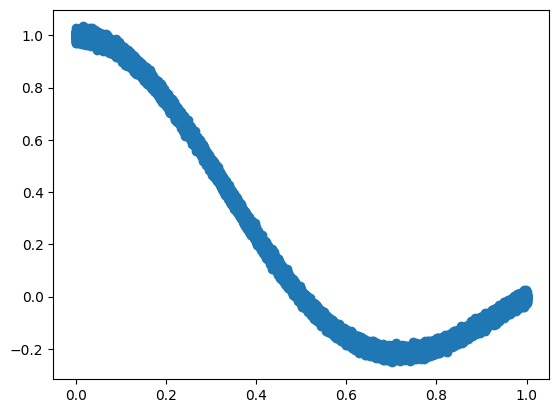

In [24]:
#!pip3 install matplotlib
import matplotlib.pyplot as plt
plt.plot(x, y, marker='o', linestyle='-')
plt.show()

## <a id='toc1_2_'></a>[Training a model](#toc0_)

In [25]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Prepare the data for training
X = x.reshape(-1, 1)  # Input needs to be 2D
Y = y

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Build a simple neural network
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(10, activation='relu', name='hidden_layer_1'),
    keras.layers.Dense(10, activation='relu', name='hidden_layer_3'),
    keras.layers.Dense(1)
])


# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, Y_train, epochs=200, verbose=0, batch_size=32,validation_data=(X_test, Y_test))

## <a id='toc1_3_'></a>[Saving model](#toc0_)

In [26]:
# # Save entire model to a file
# model.save("my_model.h5")  # HDF5 format
# # # or in TensorFlow SavedModel format
# # model.save("my_model")  # creates a folder


# # from tensorflow.keras.models import load_model
# # # Load from HDF5
# # loaded_model = load_model("my_model.h5")

## <a id='toc1_4_'></a>[Plotting training history](#toc0_)

### <a id='toc1_4_1_'></a>[matplotlib plot (non interactive) of training and validation loss](#toc0_)

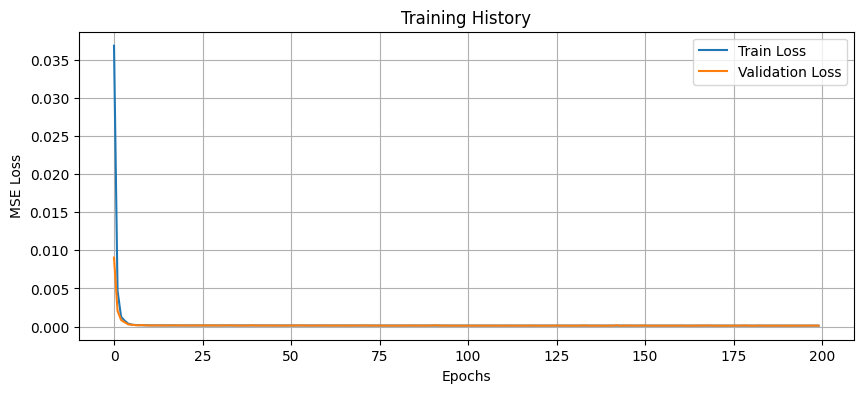

In [27]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()

### <a id='toc1_4_2_'></a>[plotly (interactive) of training and validation loss](#toc0_)

In [28]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()
# Add training and validation loss traces
fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines+markers', name='Train Loss', marker=dict(color='blue', symbol='circle')))
fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines+markers', name='Validation Loss', ))
# Update layout
fig.update_layout(title='Training History', xaxis_title='Epochs', yaxis_title='MSE Loss')#, yaxis_range= (0, 0.002) 
# Show figure
fig.show()


## Model vs prediction

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


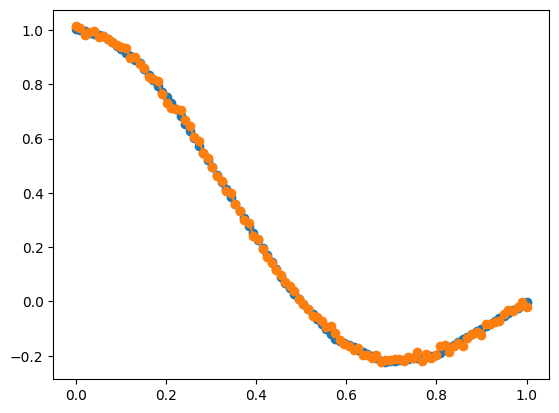

In [29]:
import numpy as np

np.random.seed(10)
xvalidation = np.linspace(0, 1, 100)
yvalidation = np.sinc(2 *  xvalidation) +  np.random.normal(0, 0.01, size=xvalidation.shape) 

Xvalidation = xvalidation.reshape(-1, 1)
predict = model.predict(Xvalidation)

import matplotlib.pyplot as plt
plt.plot(xvalidation, predict, marker='o', linestyle='-')
plt.plot(xvalidation, yvalidation, marker='o', linestyle='-')
plt.show()

## Model vs prediction ( Out of scope)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


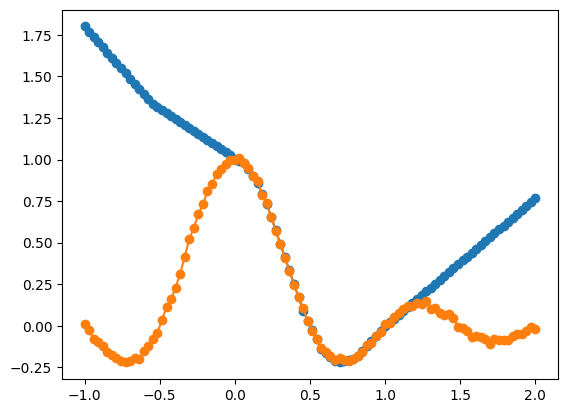

In [30]:
import numpy as np

np.random.seed(10)
xvalidation = np.linspace(-1, 2, 100)
yvalidation = np.sinc(2 *  xvalidation) +  np.random.normal(0, 0.01, size=xvalidation.shape) 

Xvalidation = xvalidation.reshape(-1, 1)
predict = model.predict(Xvalidation)

import matplotlib.pyplot as plt
plt.plot(xvalidation, predict, marker='o', linestyle='-')
plt.plot(xvalidation, yvalidation, marker='o', linestyle='-')
plt.show()

In [31]:
# # Build a simple neural network
# model = keras.Sequential([
#     keras.layers.Input(shape=(1,)),
#     keras.layers.Dense(10, activation='relu', name='hidden_layer_1'),
#     keras.layers.Dense(10, activation='relu', name='hidden_layer_3'),
#     keras.layers.Dense(1)
# ])


## <a id='toc1_5_'></a>[Let's visualize the model structure and weights](#toc0_)

In [ ]:
from modelvisualize import ModelVisualizerPlotly
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
viz = ModelVisualizerPlotly(model)
viz.summarize_table()
model.summary()
viz.visualize_structure(show_weights=True)
viz.visualize_weights_heatmaps()


+-------+----------------+-------+-------+------------+---------------+------------+
| Layer |      Name      |  Type | Units | Activation | Weights Shape | Bias Shape |
+-------+----------------+-------+-------+------------+---------------+------------+
|   0   | hidden_layer_1 | Dense |   10  |    relu    |    (1, 10)    |   (10,)    |
|   1   | hidden_layer_3 | Dense |   10  |    relu    |    (10, 10)   |   (10,)    |
|   2   |    dense_6     | Dense |   1   |   linear   |    (10, 1)    |    (1,)    |
+-------+----------------+-------+-------+------------+---------------+------------+


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 284 (1.11 KB)

## <a id='toc1_6_'></a>[Optimisation](#toc0_)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV, train_test_split
from scikeras.wrappers import KerasRegressor
from tensorflow.keras import Input
# Example data
X = x.reshape(-1, 1)
Y = y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Function to create model
def create_model(num_layers=1, num_nodes=3, activation='relu', optimizer='adam'):
    model = Sequential()
    #model.add(Dense(num_nodes, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Input(shape=(X_train.shape[1],)))  #
    for _ in range(num_layers-1):
        model.add(Dense(num_nodes, activation=activation))
    model.add(Dense(1))  # regression output
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Wrap Keras model for scikit-learn
model = KerasRegressor(model=create_model, verbose=0)

# # ✅ Grid search parameters with correct prefixes
param_grid = {
    "model__num_layers": [1, 3, 5, 10],   # belongs to create_model
    "model__num_nodes": [2,  4, 10, 20, 50, 100],
    "model__activation": ['relu', 'tanh'],   # must be model__activation
    "model__optimizer": ['adam', 'rmsprop'],    # must be model__optimizer
    "batch_size": [32],               # fit() param → no prefix
    "epochs": [200]                    # fit() param → no prefix
}


grid = GridSearchCV(estimator=model, param_grid=param_grid,
                    cv=3, n_jobs=-1, scoring="neg_mean_squared_error")

grid_result = grid.fit(X_train, Y_train)

# Print best parameters
print("Best MSE: {:.4f} using {}".format(-grid_result.best_score_, grid_result.best_params_))

# Evaluate on test set
best_model = grid_result.best_estimator_.model_
test_mse = best_model.evaluate(X_test, Y_test, verbose=0)
print(f"Test MSE: {test_mse}")


2025-09-13 20:25:17.405351: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-13 20:25:17.405823: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-13 20:25:18.445192: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-13 20:25:18.445653: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-13 20:25:22.585666: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31]

In [ ]:
{'batch_size': 32, 'epochs': 200, 'model__activation': 'relu', 'model__num_layers': 5, 'model__num_nodes': 5, 'model__optimizer': 'adam'}


{'batch_size': 32,
 'epochs': 200,
 'model__activation': 'relu',
 'model__num_layers': 5,
 'model__num_nodes': 5,
 'model__optimizer': 'adam'}

## Beyond

* What are options of optimizer
Optimizers

Optimizers control how the weights are updated during training. Common options:

Gradient Descent family

SGD (Stochastic Gradient Descent) → simple, sometimes slow but stable.

SGD(momentum=0.9) → adds momentum to escape shallow minima.

SGD(nesterov=True) → uses Nesterov accelerated gradient.

Adaptive methods

Adam → most widely used; adapts learning rates per parameter.

AdamW → Adam with weight decay (better regularization).

RMSprop → good for RNNs, balances step sizes.

Adagrad → adapts quickly, but learning rate can shrink too much.

Adadelta → variant of Adagrad with better stability.

Nadam → Adam + Nesterov momentum.

Newer ones (in tf.keras.optimizers.experimental)

Lion, AdaFactor, etc.

* What are options of method 

For Regression:

mse (Mean Squared Error) → penalizes large errors strongly.

mae (Mean Absolute Error) → more robust to outliers.

huber (Huber Loss) → combines MSE and MAE, less sensitive to noise.

logcosh → smooth version of MAE, often good for regression.

For Classification (if you switch tasks):

binary_crossentropy → binary labels (0/1).

categorical_crossentropy → multi-class, one-hot labels.

sparse_categorical_crossentropy → multi-class, integer labels.